# Sander van de Kamp
#### 500734351 
#### 17/03/2021
# ESBR rating prediction

In [7]:
# link: https://www.kaggle.com/imohtn/video-games-rating-by-esrb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd

# analyse

### probleem

Voor deze dataset wil ik het salaris voor werknemers gaan voorspellen aan de hand van de meeste labels in de dataset, hiervoor zal er gekeken worden naar het geslacht, opleiding en specialisatie.

### dimensies

Het is een kleine dataset van maar 215 rijen met 15 kolommen

### features

De dataset bestaad voor de helft uit float getallen en de andere helft bestaat uit strings

In [8]:
df = pd.read_csv('Video_games_esrb_rating.csv')
print(df.info)

<bound method DataFrame.info of                                   title  console  alcohol_reference  \
0            Monster Jam Steel Titans 2        1                  0   
1                Subnautica: Below Zero        1                  0   
2     NIER REPLICANT VER.1.22474487139…        1                  0   
3                            Jamestown+        0                  0   
4                Neptunia Virtual Stars        0                  0   
...                                 ...      ...                ...   
1890   SENRAN KAGURA Peach Beach Splash        0                  0   
1891                       Sneaky Bears        0                  0   
1892                              SPARC        0                  0   
1893                         Still Time        0                  0   
1894                  Surf World Series        1                  0   

      animated_blood  blood  blood_and_gore  cartoon_violence  crude_humor  \
0                  0      0          


# voorspelling
### Classifiers

Gebaseerd op wat scikitlearn suggereerd voor een classificatie modellen onder de 100k rijen, is dat er gebruikt gemaakt wordt van de lineare kernel op SVC. Gebaseerd op mijn eigen ervaring tot nu toe lijkt SVC ook bijna altijd de beste als het gaat om standaard classificaties, hierom denk ik dat deze het beste resultaat zal leveren.

### Hyperparams

Voor de hyperparams zullen de Kernel en de C waarde aangepast kunnen worden, de kernel is deze keer een belangrijk punt aangezien de er specifiek de lineare kernel werd aangeraden maar ook aangezien het geen text classificatie is ook de rest van de kernels. Daarnaast zal er standaard gewerkt moeten worden met de C waarde, aangezien regressie sterkte altijd invloed heeft op de uitkomst.

In [9]:
svm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 100],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly']
}

# methoden
### Preprocessing

De titels van de spellen kunnen weggelaten worden aangezien die geen impact hebben op de rating, daarnaast moeten de ratings omgezet worden naar labels via de label encoder.

### classifiers vergelijken

De classifier die met de SVM vergeleken zal worden is de KNN, deze wordt aangeraden als een goede classifier en dit is de enige die ik nog niet gebruikt heb :).

### performance metric

De performance zal weer accuracy zijn

In [10]:
# preproccesing
df.drop('title', axis = 1, inplace = True)

encoder = LabelEncoder()
encoder.fit(df.esrb_rating)
df.esrb_rating = encoder.transform(df.esrb_rating)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.esrb_rating, test_size = 0.3, random_state = 42)

In [14]:
# Classifier vergelijken
# SVM
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv = 7, n_jobs = -1)
svm_grid.fit(X_train, y_train)
print('best params: {}'.format(svm_grid.best_params_));

best params: {'C': 1, 'kernel': 'rbf'}


In [19]:
# KNN
knn = KNeighborsClassifier()
knn_grid = {
    'n_neighbors': [3, 5, 7, 9, 15],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_grid = GridSearchCV(knn, knn_grid, cv = 7, n_jobs = -1);
knn_grid.fit(X_train, y_train);
print('best params: {}'.format(knn_grid.best_params_));

best params: {'algorithm': 'auto', 'n_neighbors': 3}


# resultaten
### previous results
SVM heeft een accuracy van 0.86 en KNN een accuracy van 0.82, de SVM accuracy kan niet verder verbeterd worden met alleen de gridsearch, de C waarde ligt namelijk in het midden van de lijst dus heeft het ook geen nut om de uiterste waardes aan te passen. Het aan CV's aanpassen zal ook nauwelijks effect hebben op de accuracy, hierom zal er gekeken moeten worden naar de data om het verder te verbeteren. De KNN kan nog wel verbeteredt worder door de n_neighbors naar 1 te zetten, alleen zorgt dit ervoor dat de accuracy naar 0.8 gaat terwijl het beterscoort op de gridsearch. Dit duidt aan dat het aan het overfitten is op de training data, waardoor de test data dus slechter scoort.
Hierom moet de waarde voor de n_neighbors op minimaal 3 blijven. Als de n_neighbors boven de 3 geforceerd wordt komt het op 7 terecht, hierbij wordt de score ook weer lager op 0.8 aangezien het model dan gewoon slechter wordt.


In [20]:
print('SVM accuracy score:{}'.format(accuracy_score(y_test, svm_grid.predict(X_test))))
print('KNN accuracy score:{}'.format(accuracy_score(y_test, knn_grid.predict(X_test))))

SVM accuracy score:0.8664323374340949
KNN accuracy score:0.8154657293497364


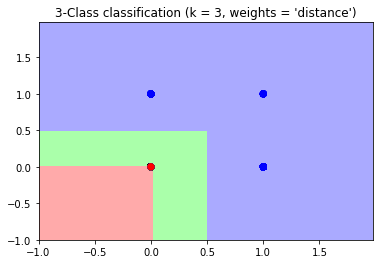

In [23]:
# Used code from online, slightly modified it link in references
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

# import some data to play with
X = df[['blood', 'violence']].to_numpy() # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = df['esrb_rating'].to_numpy()

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
            % (n_neighbors, weights))

plt.show()

# Evaluatie
Ik verwachtte dan de lineaire SVM het beste zou scoren, alleen blijkt het dus dat de vrijheid van de rbf kernel genoeg biedt om de accuracy beter te krijgen. De SVM blijft nogsteeds het beter doen dan de KNN wat ik wel verwachtte. Een KNN of SVM plot voor een dataset met alleen boolean waardes erin blijkt ook erg interessant, aangezien het eigenlijk niets bijzonders laat zien maar tegelijk nogsteeds informatief is.

# literatuurverwijzingen
Kies de juiste classifier:
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

SVM sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


KNN plot:
https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib